## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 2. Load and Explore Data

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.shape

(8807, 12)

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 3. Analysis

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce') 
df['year_added'] = df['date_added'].dt.year

df['type'] = df['type'].astype('category')

In [7]:
def parse_duration(row):
    if row['type'] == "Movie":
        m = re.search(r"(\d+)", str(row['duration']))
        return int(m.group(1)) if m else np.nan
    elif row['type'] == "TV Show":
        m = re.search(r"(\d+)", str(row['duration']))
        return int(m.group(1)) if m else np.nan
    return np.nan

df['duration_parsed'] = df.apply(parse_duration, axis=1)

df['movie_minutes'] = np.where(df['type']=="Movie", df['duration_parsed'], np.nan)
df['seasons'] = np.where(df['type']=="TV Show", df['duration_parsed'], np.nan)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


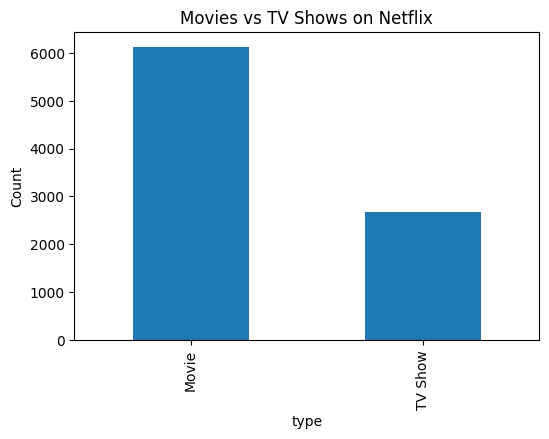

In [8]:
type_counts = df['type'].value_counts()
print(type_counts)

plt.figure(figsize=(6,4))
type_counts.plot(kind='bar')
plt.title("Movies vs TV Shows on Netflix")
plt.ylabel("Count")
plt.show()

In [10]:
yearly = df['year_added'].value_counts().sort_index()
print(yearly)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


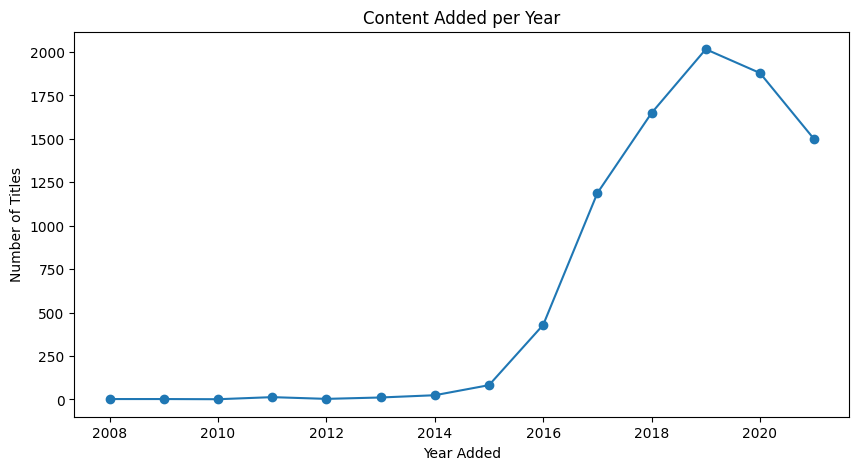

In [11]:
plt.figure(figsize=(10,5))
yearly.plot(kind='line', marker='o')
plt.title("Content Added per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

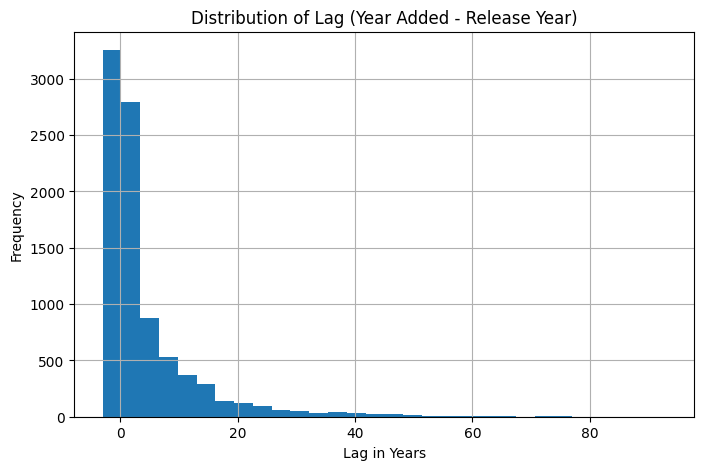

In [12]:
df['lag_years'] = df['year_added'] - df['release_year']
plt.figure(figsize=(8,5))
df['lag_years'].dropna().hist(bins=30)
plt.title("Distribution of Lag (Year Added - Release Year)")
plt.xlabel("Lag in Years")
plt.ylabel("Frequency")
plt.show()

In [13]:
genres = df['listed_in'].dropna().str.split(', ')
genres_exploded = genres.explode()
top_genres = genres_exploded.value_counts().head(15)
print(top_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64


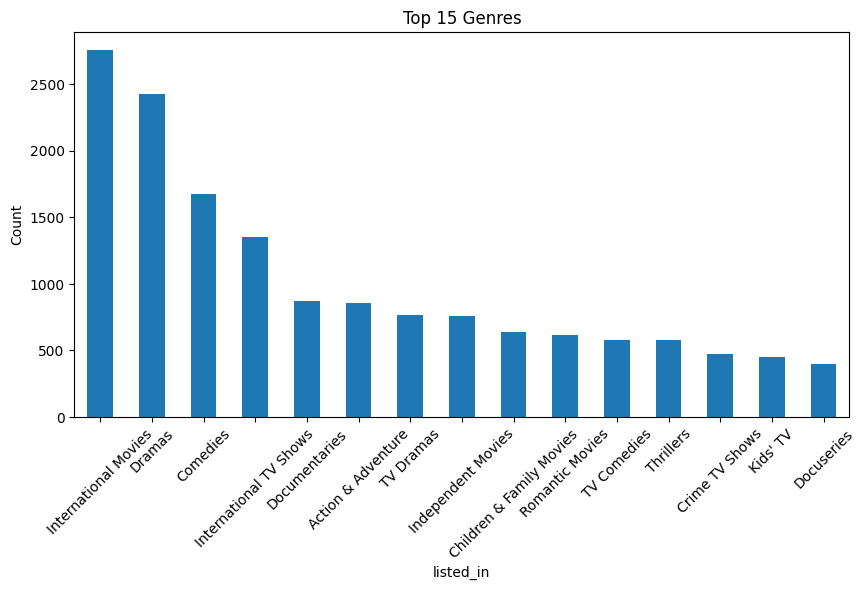

In [14]:
plt.figure(figsize=(10,5))
top_genres.plot(kind='bar')
plt.title("Top 15 Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
countries = df['country'].dropna().str.split(', ')
countries_exploded = countries.explode()
top_countries = countries_exploded.value_counts().head(15)
print(top_countries)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64


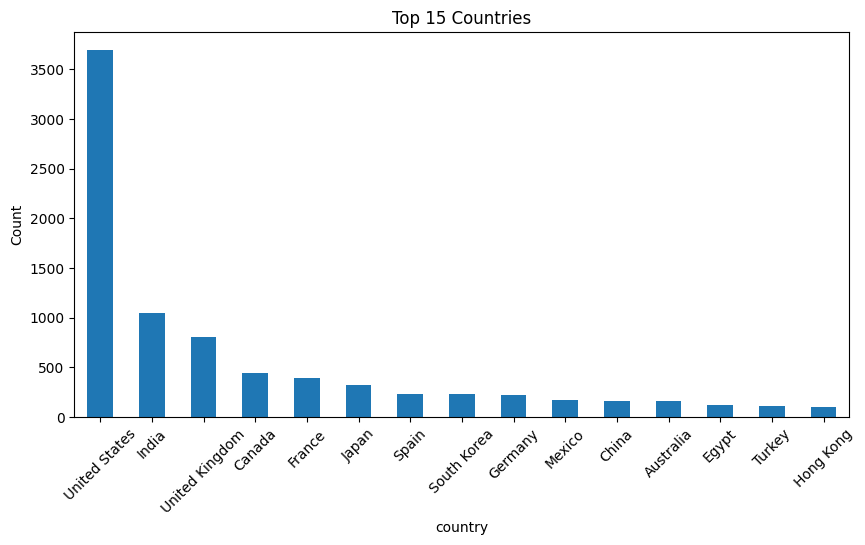

In [17]:
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 15 Countries")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [19]:
ratings = df['rating'].fillna("Unknown").value_counts().head(10)
print(ratings)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


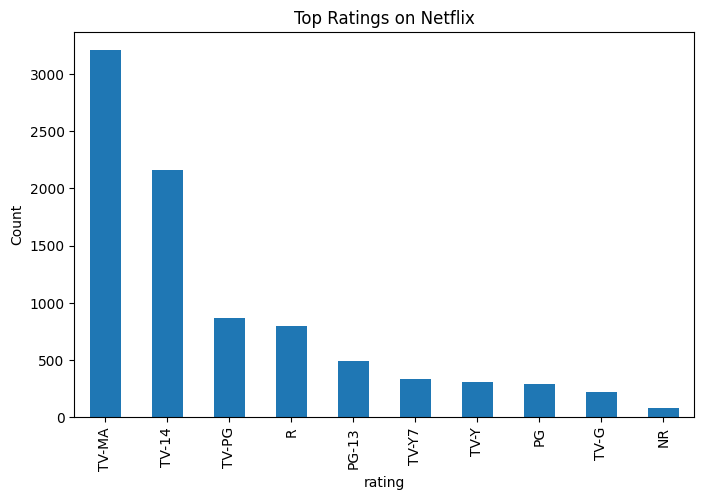

In [20]:
plt.figure(figsize=(8,5))
ratings.plot(kind='bar')
plt.title("Top Ratings on Netflix")
plt.ylabel("Count")
plt.show()

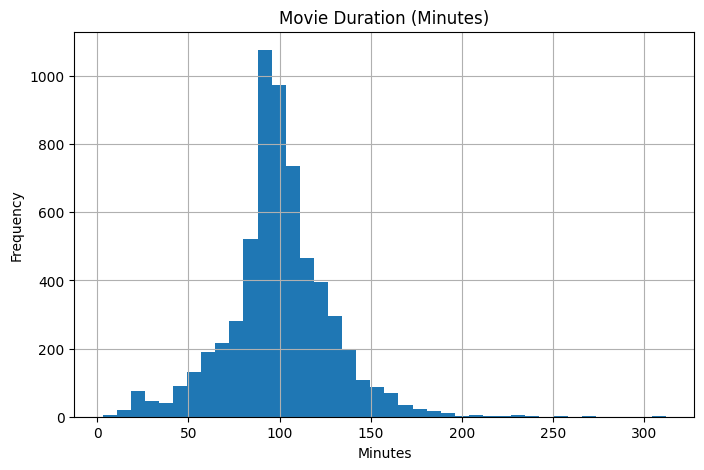

In [21]:
plt.figure(figsize=(8,5))
df['movie_minutes'].dropna().hist(bins=40)
plt.title("Movie Duration (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

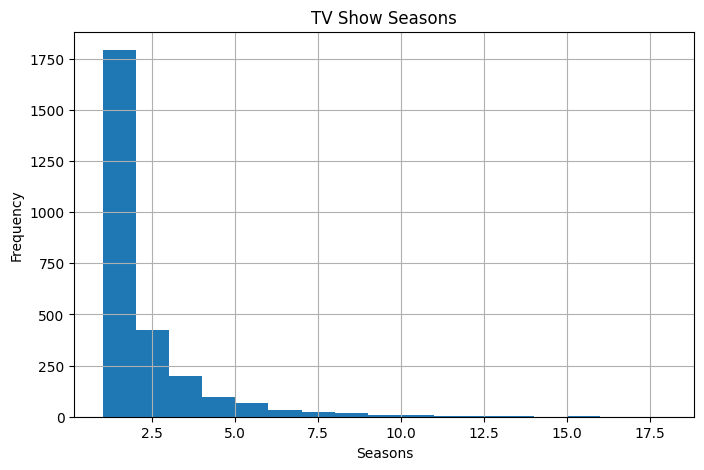

In [22]:
plt.figure(figsize=(8,5))
df['seasons'].dropna().hist(bins=range(1, int(df['seasons'].dropna().max())+2))
plt.title("TV Show Seasons")
plt.xlabel("Seasons")
plt.ylabel("Frequency")
plt.show()

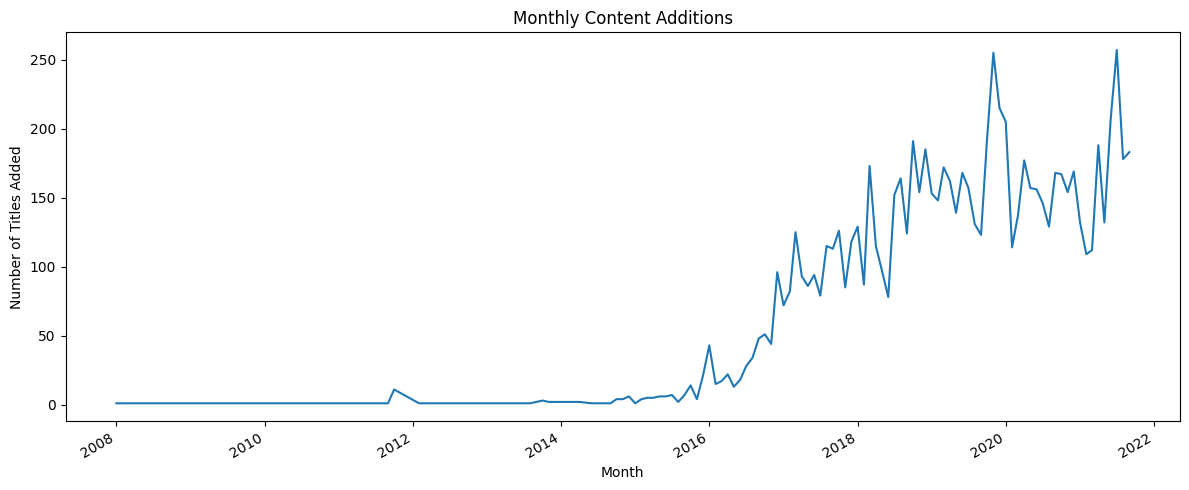

In [23]:
monthly = df['date_added'].dt.to_period('M').value_counts().sort_index()
monthly.index = monthly.index.to_timestamp()
plt.figure(figsize=(12,5))
monthly.plot(kind='line')
plt.title('Monthly Content Additions')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()